In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu
import folium
from folium.plugins import MarkerCluster

In [81]:
excel = pd.ExcelFile("https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export/format=xlxs")
excel.sheet_names

['amsterdam_weekdays',
 'amsterdam_weekends',
 'athens_weekdays',
 'athens_weekends',
 'berlin_weekends',
 'berlin_weekdays',
 'barcelona_weekdays',
 'barcelona_weekends',
 'budapest_weekdays',
 'budapest_weekends',
 'lisbon_weekdays',
 'lisbon_weekends',
 'london_weekdays',
 'london_weekends',
 'paris_weekdays',
 'paris_weekends',
 'rome_weekdays',
 'rome_weekends',
 'vienna_weekdays',
 'vienna_weekends']

In [82]:
sheet_names = excel.sheet_names
all_sheets = []

for sheet_name in sheet_names:
    df = excel.parse(sheet_name)
    df = df.drop(df.columns[0], axis=1)
    
    city_name, day_type = sheet_name.split('_')
    df['city'] = city_name.capitalize()
    df['day_type'] = day_type.capitalize()

    all_sheets.append(df)

combined_df = pd.concat(all_sheets, ignore_index=True).reset_index(drop=True)
print(combined_df.head())


      realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True                2   
1  344.245776  Private room        False          True                4   
2  264.101422  Private room        False          True                2   
3  433.529398  Private room        False          True                4   
4  485.552926  Private room        False          True                2   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                  10   
1              False      0    0                   8   
2              False      0    1                   9   
3              False      0    1                   9   
4               True      0    0                  10   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                          93  ...  5.022964    2.539380   78.690379   
1                          85  ...  0.488389    0.239404  631.176378

In [83]:
combined_df.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'city', 'day_type'],
      dtype='object')

In [84]:
int_columns = ['person_capacity', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms']
combined_df[int_columns] = combined_df[int_columns].astype('int64')
float_columns = ['realSum', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
                 'rest_index_norm', 'lng', 'lat']
combined_df[float_columns] = combined_df[float_columns].astype('float64')
display(combined_df.head())

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekdays
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekdays
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekdays
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekdays
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekdays


In [85]:
city_to_country = {
    'Amsterdam': 'Netherlands',
    'Athens': 'Greece',
    'Berlin': 'Germany',
    'Barcelona': 'Spain',
    'Budapest': 'Hungary',
    'Lisbon': 'Portugal',
    'London': 'United Kingdom',
    'Paris': 'France',
    'Rome': 'Italy',
    'Vienna': 'Austria'
}
combined_df['country'] = combined_df['city'].map(city_to_country)
combined_df = combined_df.rename(columns={'realSum': 'price'})
combined_df.head()

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekdays,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekdays,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekdays,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekdays,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekdays,Netherlands


In [86]:
combined_df = combined_df.drop(columns=['room_type'], errors='ignore')
combined_df['room_shared'] = combined_df['room_shared'].astype(str).str.upper()
combined_df['room_private'] = combined_df['room_private'].astype(str).str.upper()
conditions = [
    (combined_df['room_shared'] == 'TRUE'),  # Shared room
    (combined_df['room_private'] == 'TRUE') & (combined_df['room_shared'] == 'FALSE'), 
    (combined_df['room_shared'] == 'FALSE') & (combined_df['room_private'] == 'FALSE')  
]
choices = ['Shared', 'Private', 'Entire Apt']
combined_df['room_type'] = np.select(conditions, choices, default='Unknown')
combined_df = combined_df.drop(columns=['room_shared', 'room_private'])

display(combined_df.head())


,price,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type,country,room_type
0,194.033698,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekdays,Netherlands,Private
1,344.245776,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekdays,Netherlands,Private
2,264.101422,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekdays,Netherlands,Private
3,433.529398,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekdays,Netherlands,Private
4,485.552926,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekdays,Netherlands,Private


In [87]:
combined_df['host_is_superhost'] = combined_df['host_is_superhost'].replace({True : 'Superhost', False : 'Normalhost'})
display(combined_df.head())

,price,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type,country,room_type
0,194.033698,2,Normalhost,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Weekdays,Netherlands,Private
1,344.245776,4,Normalhost,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Weekdays,Netherlands,Private
2,264.101422,2,Normalhost,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Weekdays,Netherlands,Private
3,433.529398,4,Normalhost,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,Weekdays,Netherlands,Private
4,485.552926,2,Superhost,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,Weekdays,Netherlands,Private


In [88]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       51707 non-null  float64
 1   person_capacity             51707 non-null  int64  
 2   host_is_superhost           51707 non-null  object 
 3   multi                       51707 non-null  int64  
 4   biz                         51707 non-null  int64  
 5   cleanliness_rating          51707 non-null  int64  
 6   guest_satisfaction_overall  51707 non-null  int64  
 7   bedrooms                    51707 non-null  int64  
 8   dist                        51707 non-null  float64
 9   metro_dist                  51707 non-null  float64
 10  attr_index                  51707 non-null  float64
 11  attr_index_norm             51707 non-null  float64
 12  rest_index                  51707 non-null  float64
 13  rest_index_norm             517

In [89]:
combined_df.describe()

,price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [90]:
# 1. How many listings are in each city in total and also per type of day?

total_listings_per_city = (
    combined_df.groupby('city').size()
    .reset_index(name='total_listings')
    .sort_values(by='total_listings', ascending=False)
    .reset_index(drop=True)
)
print("Total listings per city:")
display(total_listings_per_city)

listings_per_city_day_type = (
    combined_df.groupby(['city', 'day_type']).size()
    .reset_index(name='listings_count')
)
print("\nListings per city by Day Type:")
display(listings_per_city_day_type)

Total listings per city:


,city,total_listings
0,London,9993
1,Rome,9027
2,Paris,6688
3,Lisbon,5763
4,Athens,5280
5,Budapest,4022
6,Vienna,3537
7,Barcelona,2833
8,Berlin,2484
9,Amsterdam,2080



Listings per city by Day Type:


,city,day_type,listings_count
0,Amsterdam,Weekdays,1103
1,Amsterdam,Weekends,977
2,Athens,Weekdays,2653
3,Athens,Weekends,2627
4,Barcelona,Weekdays,1555
5,Barcelona,Weekends,1278
6,Berlin,Weekdays,1284
7,Berlin,Weekends,1200
8,Budapest,Weekdays,2074
9,Budapest,Weekends,1948


In [91]:
# 2) Which city has the biggest proportion of superhosts?

superhost_counts = combined_df[combined_df['host_is_superhost'] == 'Superhost'].groupby('city').size().reset_index(name='superhost_count')
total_counts = combined_df.groupby('city').size().reset_index(name='total_count')
city_superhost_proportion = superhost_counts.merge(total_counts, on='city')
city_superhost_proportion['superhost_proportion'] = (city_superhost_proportion['superhost_count'] / city_superhost_proportion['total_count'] * 100).round(2)
highest_superhost_city = city_superhost_proportion.sort_values(by='superhost_proportion', ascending=False).reset_index(drop=True)

print("City with the highest proportion of superhosts:")
display(highest_superhost_city)

highest_city = highest_superhost_city.iloc[0]
print(f"\nCity with the highest proportion of superhosts: {highest_city['city']} with {highest_city['superhost_proportion']}% superhosts")

City with the highest proportion of superhosts:


,city,superhost_count,total_count,superhost_proportion
0,Athens,2263,5280,42.86
1,Budapest,1524,4022,37.89
2,Rome,2949,9027,32.67
3,Amsterdam,591,2080,28.41
4,Vienna,1005,3537,28.41
5,Berlin,639,2484,25.72
6,Lisbon,1233,5763,21.40
7,Barcelona,514,2833,18.14
8,London,1573,9993,15.74
9,Paris,941,6688,14.07



City with the highest proportion of superhosts: Athens with 42.86% superhosts


In [92]:
# 3. Which cities have listings with more than four rooms?

listings_more_than_four_rooms = combined_df[combined_df['bedrooms'] > 4]
cities_with_more_than_four_rooms_count = listings_more_than_four_rooms.groupby('city').size().reset_index(name='count').sort_values(by='count', ascending=False).reset_index(drop=True)

print("Cities with more than four rooms and their respective counts:")
print(cities_with_more_than_four_rooms_count)

city_with_most_listings = cities_with_more_than_four_rooms_count.iloc[0] 
print(f"\nCity with the most listings with more than four rooms: {city_with_most_listings['city']} with {city_with_most_listings['count']} listings")

Cities with more than four rooms and their respective counts:
        city  count
0     Lisbon     10
1     London      5
2  Amsterdam      4
3  Barcelona      2
4     Berlin      2
5      Paris      2
6       Rome      1

City with the most listings with more than four rooms: Lisbon with 10 listings


In [93]:
# 4. Which city has the most entire home/apt type listings?

entire_home_listings = combined_df[combined_df['room_type'] == 'Entire Apt']
entire_home_count_per_city = entire_home_listings.groupby('city').size().reset_index(name='entire_home_count')
entire_home_count_per_city = entire_home_count_per_city.sort_values(by='entire_home_count', ascending=False).reset_index(drop=True)
print("Number of 'Entire Apt' Listings per City:")
print(entire_home_count_per_city)

city_with_most_entire_apt = entire_home_count_per_city.iloc[0] 
print(f"\nCity with the highest number of 'Entire Apt' listings: {city_with_most_entire_apt['city']} with {city_with_most_entire_apt['entire_home_count']} listings")


Number of 'Entire Apt' Listings per City:
        city  entire_home_count
0       Rome               5561
1      Paris               5067
2     Athens               4872
3     London               4384
4     Lisbon               3878
5   Budapest               3589
6     Vienna               2747
7  Amsterdam               1126
8     Berlin                882
9  Barcelona                542

City with the highest number of 'Entire Apt' listings: Rome with 5561 listings


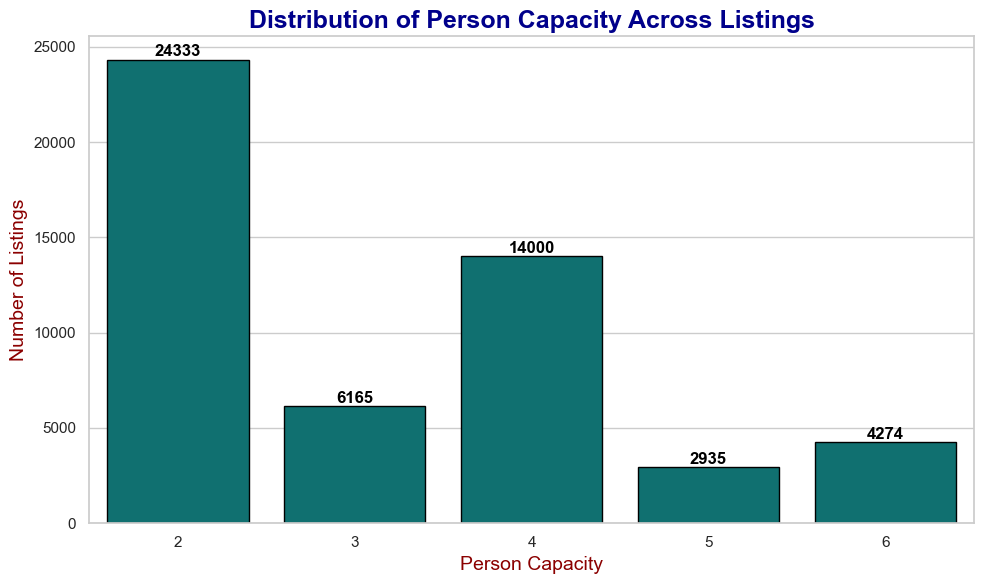

Conclusion: The most common person capacity is 2 with 24333 listings.


In [94]:
#  6) How does person_capacity vary across listings? What is the most common capacity of listings?

person_capacity_counts = combined_df['person_capacity'].value_counts().sort_index()
person_capacity_df = person_capacity_counts.reset_index()
person_capacity_df.columns = ['person_capacity', 'count']
sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=person_capacity_df, x='person_capacity', y='count', color='teal', edgecolor='black')

plt.title("Distribution of Person Capacity Across Listings", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Person Capacity", fontsize=14, color='darkred')
plt.ylabel("Number of Listings", fontsize=14, color='darkred')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5,
            f'{int(height)}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

most_common_capacity = person_capacity_df.loc[person_capacity_df['count'].idxmax()]
print(f"Conclusion: The most common person capacity is {most_common_capacity['person_capacity']} with {most_common_capacity['count']} listings.")


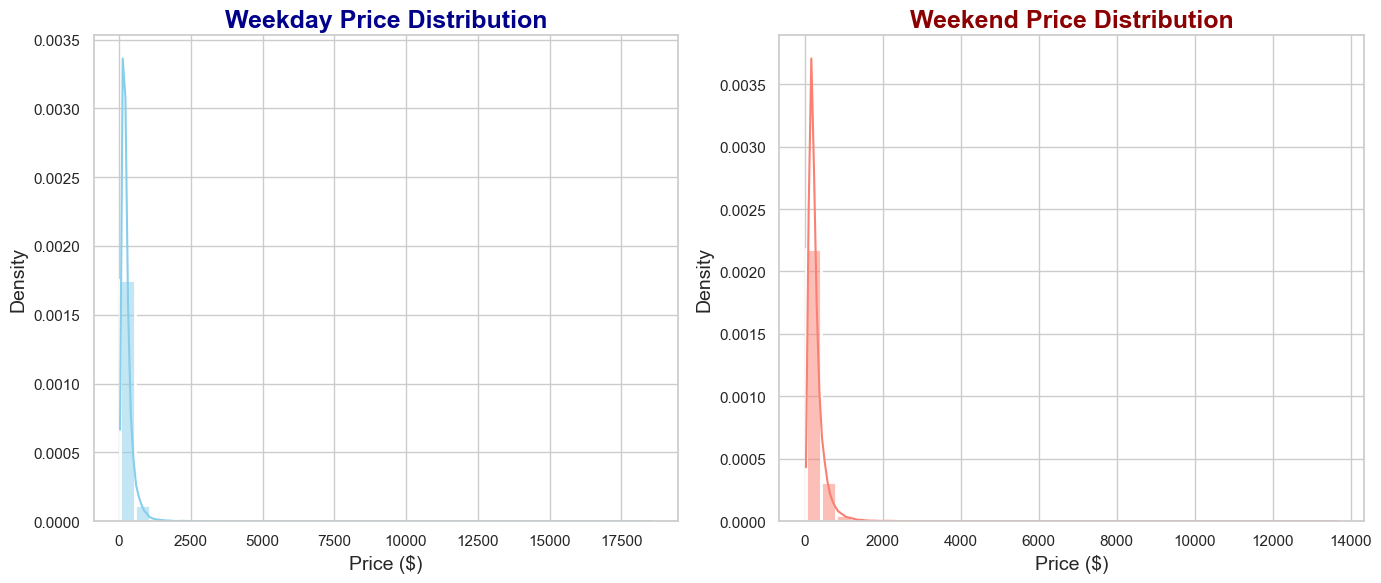

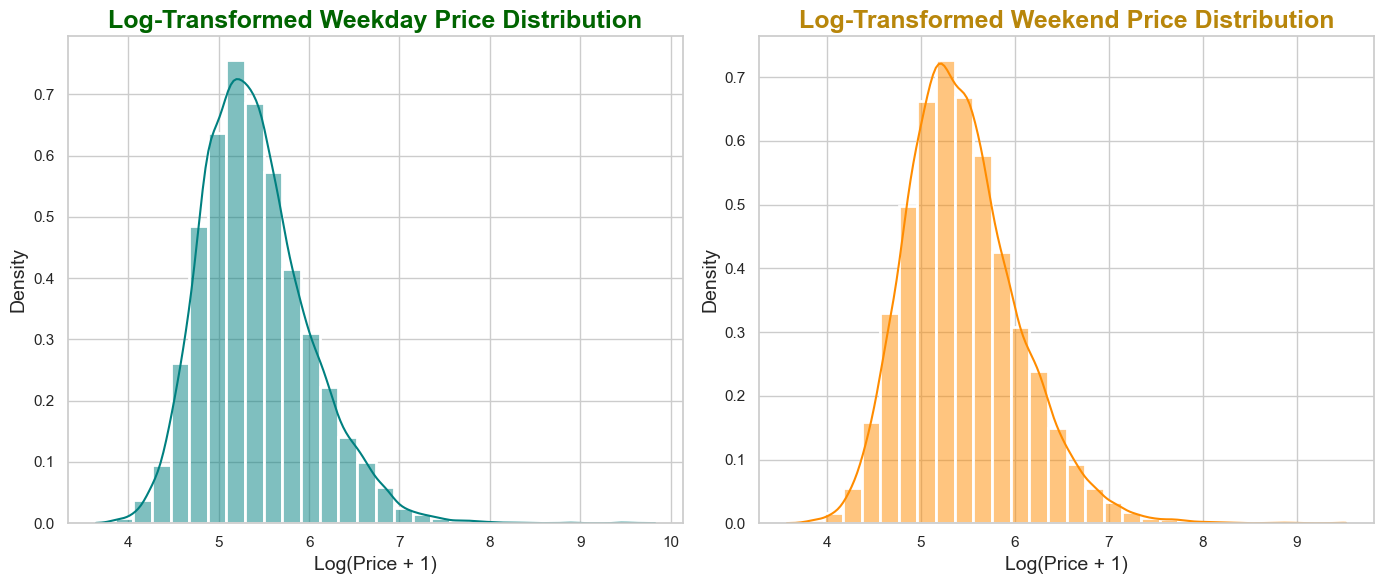

In [95]:
# 7. Plot the distribution of realSum for both weekday and weekend offers. Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations (e.g., log transformation) to normalize it

weekday_prices = combined_df[combined_df['day_type'] == 'Weekdays']['price']
weekend_prices = combined_df[combined_df['day_type'] == 'Weekends']['price']

sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(weekday_prices, bins=35, color='skyblue', kde=True, stat="density", linewidth=2)
plt.title("Weekday Price Distribution", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(weekend_prices, bins=35, color='salmon', kde=True, stat="density", linewidth=2)
plt.title("Weekend Price Distribution", fontsize=18, fontweight='bold', color='darkred')
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

weekday_prices_log = np.log1p(weekday_prices)
weekend_prices_log = np.log1p(weekend_prices)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(weekday_prices_log, bins=30, color='teal', kde=True, stat="density", linewidth=2)
plt.title("Log-Transformed Weekday Price Distribution", fontsize=18, fontweight='bold', color='darkgreen')
plt.xlabel("Log(Price + 1)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(weekend_prices_log, bins=30, color='darkorange', kde=True, stat="density", linewidth=2)
plt.title("Log-Transformed Weekend Price Distribution", fontsize=18, fontweight='bold', color='darkgoldenrod')
plt.xlabel("Log(Price + 1)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()


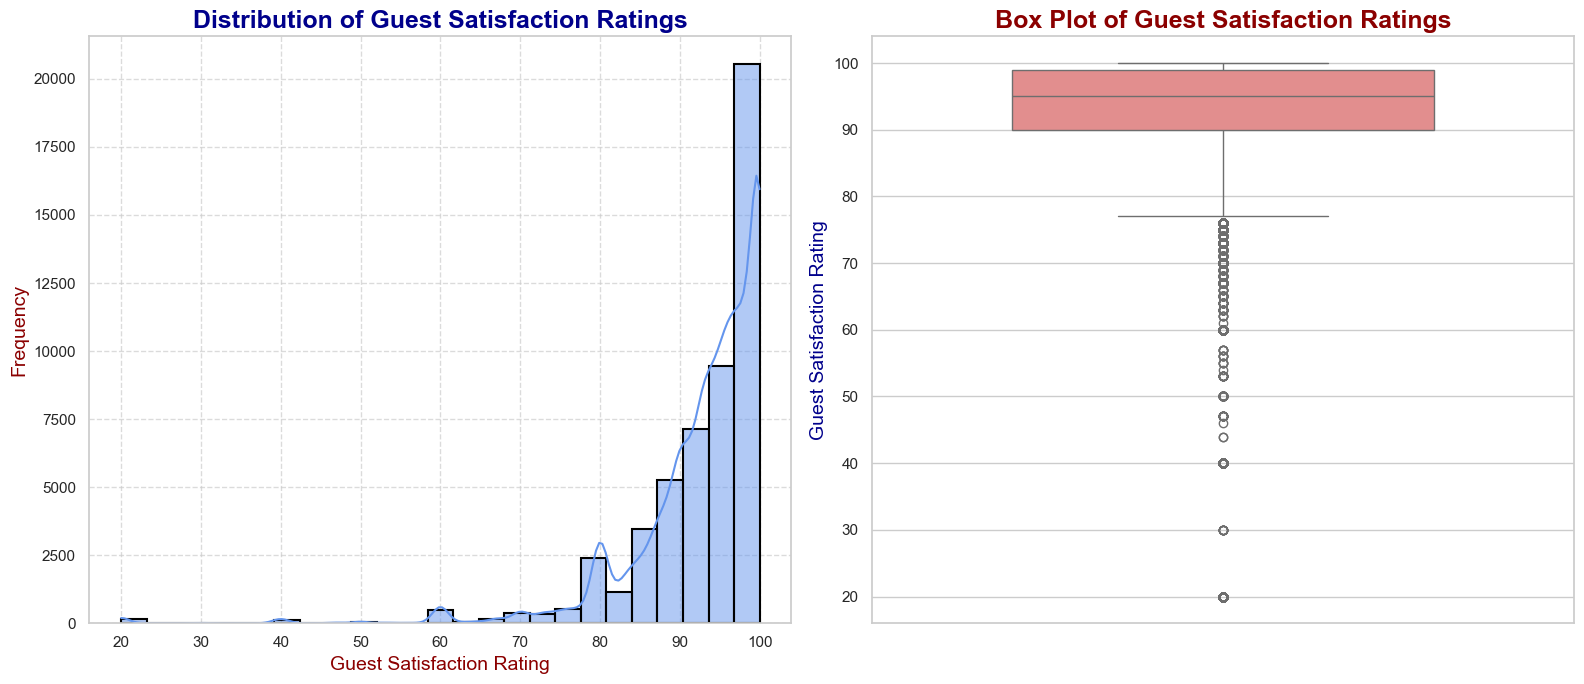

In [96]:
# 8. Plot the distribution of guest_satisfaction_overall ratings. 

guest_satisfaction_ratings = combined_df['guest_satisfaction_overall']

sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1) 
sns.histplot(guest_satisfaction_ratings, bins=25, kde=True, color='cornflowerblue', edgecolor="black", linewidth=1.5)
plt.title("Distribution of Guest Satisfaction Ratings", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Guest Satisfaction Rating", fontsize=14, color='darkred')
plt.ylabel("Frequency", fontsize=14, color='darkred')
plt.grid(True, linestyle='--', alpha=0.7) 

plt.subplot(1, 2, 2) 
sns.boxplot(y=guest_satisfaction_ratings, color='lightcoral', width=0.6)
plt.title("Box Plot of Guest Satisfaction Ratings", fontsize=18, fontweight='bold', color='darkred')
plt.ylabel("Guest Satisfaction Rating", fontsize=14, color='darkblue')

plt.tight_layout()

plt.show()

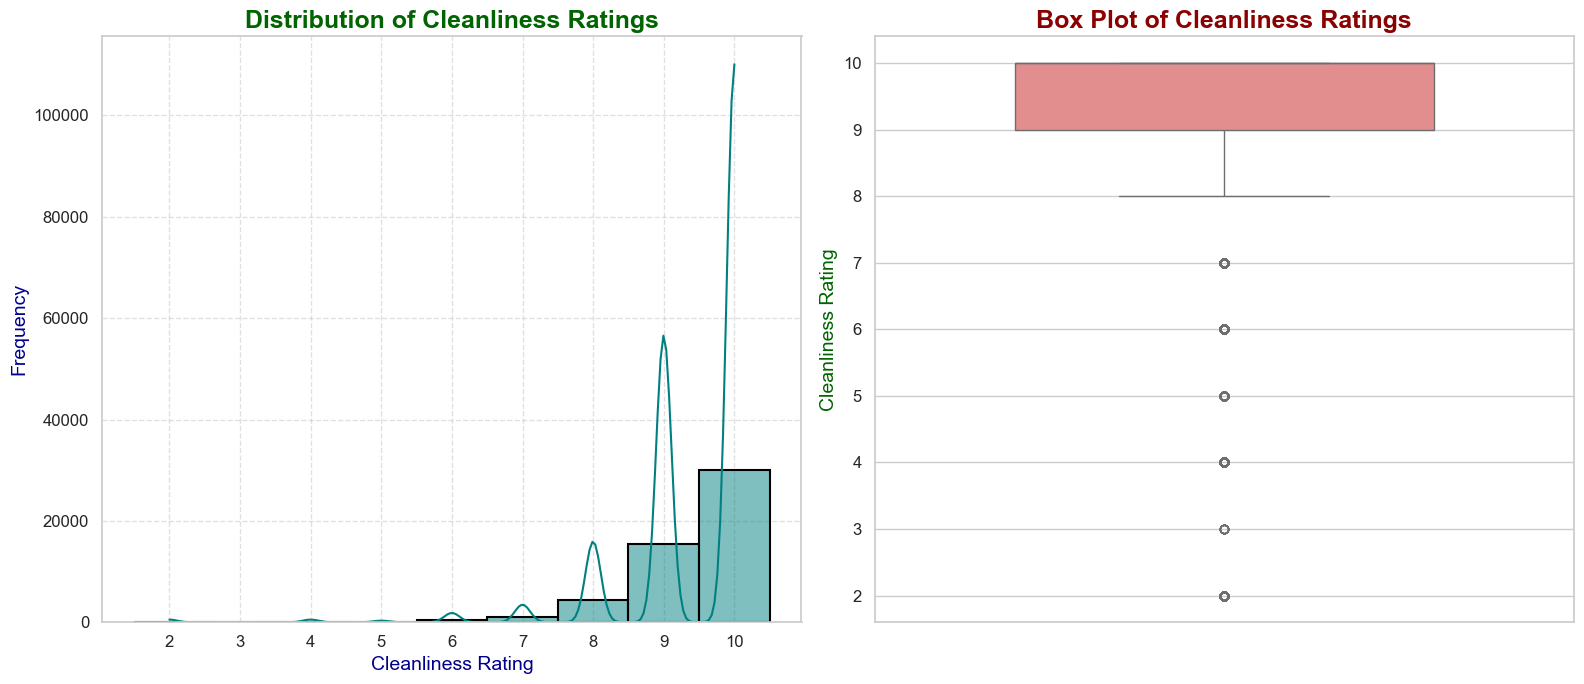

In [97]:
# 9. Examine the distribution of cleanliness_rating

cleanliness_ratings = combined_df['cleanliness_rating']
sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1) 
sns.histplot(cleanliness_ratings, bins=np.arange(1.5, 11.5, 1), kde=True, color='teal', edgecolor='black', linewidth=1.5)
plt.title("Distribution of Cleanliness Ratings", fontsize=18, fontweight='bold', color='darkgreen')
plt.xlabel("Cleanliness Rating", fontsize=14, color='darkblue')
plt.ylabel("Frequency", fontsize=14, color='darkblue')
plt.xticks(np.arange(2, 11, 1), fontsize=12) 
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2) 
sns.boxplot(y=cleanliness_ratings, color='lightcoral', width=0.6)
plt.title("Box Plot of Cleanliness Ratings", fontsize=18, fontweight='bold', color='darkred')
plt.ylabel("Cleanliness Rating", fontsize=14, color='darkgreen')
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()



In [98]:
# Testing

In [99]:
def compare_groups(group1, group2, combined_df, column, test_type="mannwhitneyu"):

    group1_data = combined_df[combined_df['group'] == group1][column]
    group2_data = combined_df[combined_df['group'] == group2][column]
    
    mean_group1 = group1_data.mean()
    mean_group2 = group2_data.mean()
    median_group1 = group1_data.median()
    median_group2 = group2_data.median()

    print(f"Mean for {group1}: {mean_group1:.2f}")
    print(f"Mean for {group2}: {mean_group2:.2f}")
    print(f"Median for {group1}: {median_group1:.2f}")
    print(f"Median for {group2}: {median_group2:.2f}")

    stat1, p_value1 = shapiro(group1_data)
    stat2, p_value2 = shapiro(group2_data)
    print(f"Shapiro-Wilk test for {group1}: Stat={stat1}, p-value={p_value1}")
    print(f"Shapiro-Wilk test for {group2}: Stat={stat2}, p-value={p_value2}")
    
    if p_value1 > 0.05 and p_value2 > 0.05:
        print(f"Both groups are normally distributed, performing t-test...")
        # Perform t-test (independent, unpaired test)
        t_stat, p_value = ttest_ind(group1_data, group2_data, nan_policy='omit')
        print(f"T-test Results: t-stat={t_stat:.2f}, p-value={p_value:.6f}")
        if p_value < 0.05:
            print(f"Conclusion: Significant difference between {group1} and {group2}.")
        else:
            print(f"Conclusion: No significant difference between {group1} and {group2}.")
    else:
        print(f"One or both groups' data is not normally distributed, performing Mann-Whitney U test...")
        # Perform Mann-Whitney U test (non-parametric test)
        u_stat, p_value = mannwhitneyu(group1_data, group2_data, alternative='two-sided')
        print(f"Mann-Whitney U Test Results: U-stat={u_stat}, p-value={p_value}")
        if p_value < 0.05:
            print(f"Conclusion: Significant difference between {group1} and {group2}.")
        else:
            print(f"Conclusion: No significant difference between {group1} and {group2}.")

    # Check which group has higher mean price
    if mean_group1 > mean_group2:
        print(f"Conclusion: {group1} has higher values for {column}.")
    else:
        print(f"Conclusion: {group2} has higher values for {column}.")
        
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=combined_df[combined_df['group'].isin([group1, group2])], x='group', y=column)
    plt.title(f"Comparison Between {group1} and {group2}", fontsize=16, fontweight='bold')
    plt.ylabel(column, fontsize=14)
    plt.xlabel("Group", fontsize=14)
    plt.show()

Mean for Athens: 151.74
Mean for Budapest: 176.51
Median for Athens: 127.72
Median for Budapest: 152.98
Shapiro-Wilk test for Athens: Stat=0.10035787799692608, p-value=8.216933992306736e-95
Shapiro-Wilk test for Budapest: Stat=0.4371680744856924, p-value=1.8293096595428347e-77
One or both groups' data is not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U Test Results: U-stat=7930841.0, p-value=2.1447940373152744e-97
Conclusion: Significant difference between Athens and Budapest.
Conclusion: Budapest has higher values for price.


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5280.
  res = hypotest_fun_out(*samples, **kwds)


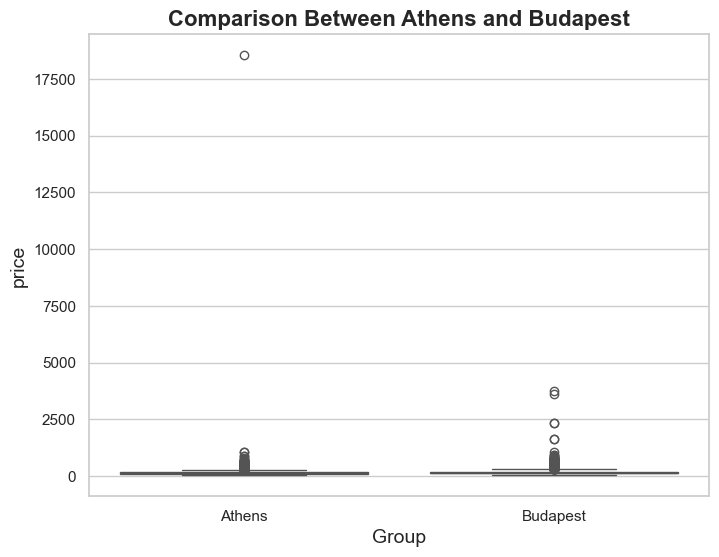

In [100]:
# 1) Is there a difference in price between two cities? Choose at least three pairs of cities during weekdays.

combined_df['group'] = combined_df['city'] 
compare_groups('Athens', 'Budapest', combined_df, 'price')

Mean for Amsterdam: 573.11
Mean for Paris: 392.53
Median for Amsterdam: 460.24
Median for Paris: 317.60
Shapiro-Wilk test for Amsterdam: Stat=0.629817367834485, p-value=4.2058399700077474e-55
Shapiro-Wilk test for Paris: Stat=0.478680034404915, p-value=2.97309574356695e-88
One or both groups' data is not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U Test Results: U-stat=9686344.0, p-value=1.4747542141328009e-161
Conclusion: Significant difference between Amsterdam and Paris.
Conclusion: Amsterdam has higher values for price.


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


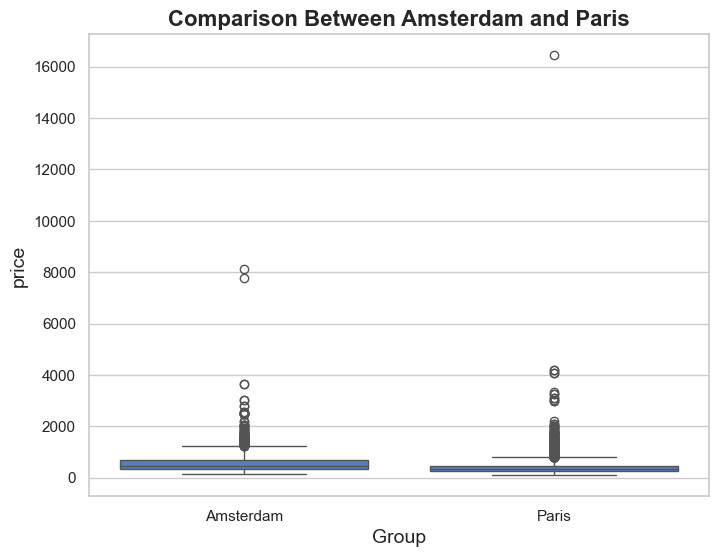

In [101]:
combined_df['group'] = combined_df['city'] 
compare_groups('Amsterdam', 'Paris', combined_df, 'price')

Mean for Lisbon: 238.21
Mean for London: 362.47
Median for Lisbon: 225.38
Median for London: 261.29
Shapiro-Wilk test for Lisbon: Stat=0.8869368088313498, p-value=6.115166676800006e-54
Shapiro-Wilk test for London: Stat=0.356941354206464, p-value=7.914857838126876e-104
One or both groups' data is not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U Test Results: U-stat=22624501.0, p-value=1.664347412710198e-111
Conclusion: Significant difference between Lisbon and London.
Conclusion: London has higher values for price.


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5763.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9993.
  res = hypotest_fun_out(*samples, **kwds)


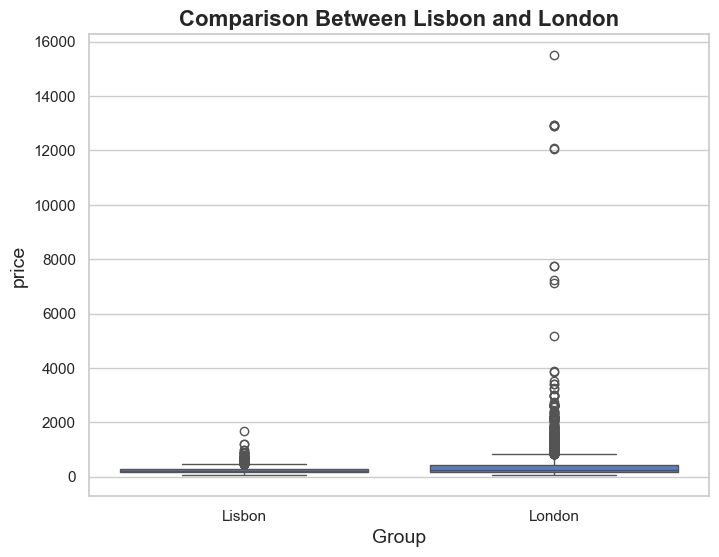

In [102]:
combined_df['group'] = combined_df['city'] 
compare_groups('Lisbon', 'London', combined_df, 'price')

Mean for Weekdays: 275.68
Mean for Weekends: 283.96
Median for Weekdays: 207.15
Median for Weekends: 216.46
Shapiro-Wilk test for Weekdays: Stat=0.3191290640486042, p-value=8.083696564838494e-132
Shapiro-Wilk test for Weekends: Stat=0.4389728516362573, p-value=5.024247721478519e-127
One or both groups' data is not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U Test Results: U-stat=320313415.0, p-value=3.71519189632101e-16
Conclusion: Significant difference between Weekdays and Weekends.
Conclusion: Weekends has higher values for price.


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25500.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26207.
  res = hypotest_fun_out(*samples, **kwds)


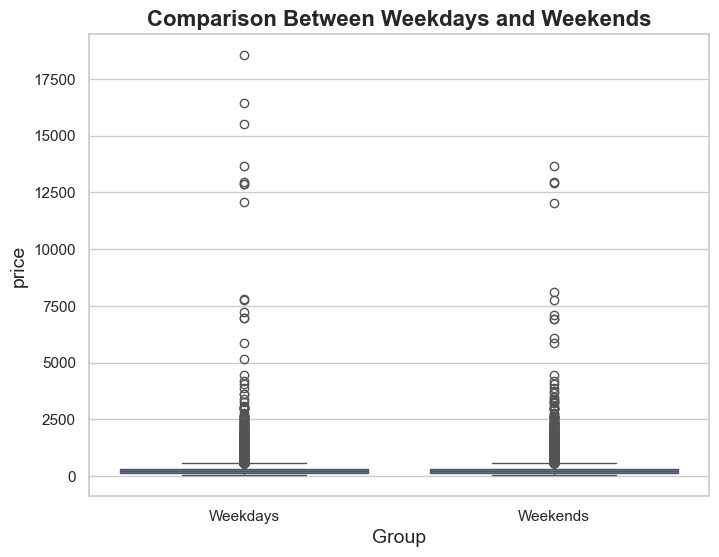

In [103]:
# 2) Does the price tend to be higher on weekends?

combined_df['group'] = combined_df['day_type']
compare_groups('Weekdays', 'Weekends', combined_df, 'price')

Mean for Superhost: 254.45
Mean for Normalhost: 288.63
Median for Superhost: 197.04
Median for Normalhost: 217.55
Shapiro-Wilk test for Superhost: Stat=0.3156725941079954, p-value=3.391925704546569e-113
Shapiro-Wilk test for Normalhost: Stat=0.386895485736538, p-value=1.3751096283640372e-140
One or both groups' data is not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U Test Results: U-stat=230623961.5, p-value=1.0570129121179922e-58
Conclusion: Significant difference between Superhost and Normalhost.
Conclusion: Normalhost has higher values for price.


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13232.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38475.
  res = hypotest_fun_out(*samples, **kwds)


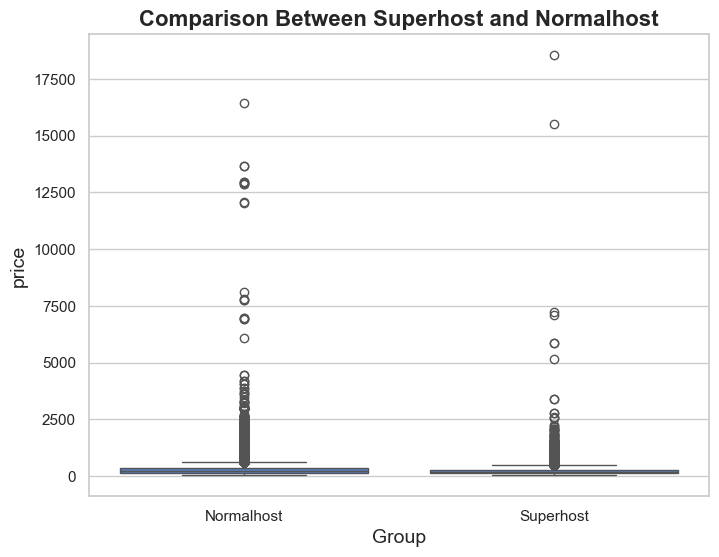

In [104]:
# 3) Are listings of superhosts more expensive than those of normal hosts?

combined_df['group'] = combined_df['host_is_superhost']
compare_groups('Superhost', 'Normalhost', combined_df, 'price')

Mean for Superhost: 2.96
Mean for Normalhost: 3.27
Median for Superhost: 2.39
Median for Normalhost: 2.70
Shapiro-Wilk test for Superhost: Stat=0.8422568900584816, p-value=1.0463328125022926e-77
Shapiro-Wilk test for Normalhost: Stat=0.8783884133379807, p-value=6.227192445259103e-96
One or both groups' data is not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U Test Results: U-stat=232379752.0, p-value=1.171168997231581e-50
Conclusion: Significant difference between Superhost and Normalhost.
Conclusion: Normalhost has higher values for dist.


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13232.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38475.
  res = hypotest_fun_out(*samples, **kwds)


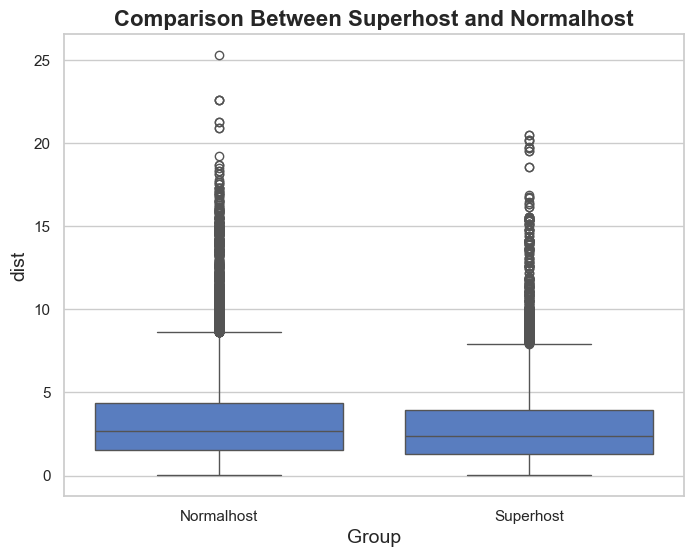

In [105]:
# 4) Are superhosts closer to the city center and metro station than normal hosts?

combined_df['group'] = combined_df['host_is_superhost']
compare_groups('Superhost', 'Normalhost', combined_df, 'dist')

Mean for Superhost: 0.68
Mean for Normalhost: 0.68
Median for Superhost: 0.43
Median for Normalhost: 0.41
Shapiro-Wilk test for Superhost: Stat=0.5993178011541767, p-value=1.8258201803371825e-99
Shapiro-Wilk test for Normalhost: Stat=0.5888358722059731, p-value=9.363505141306928e-129
One or both groups' data is not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U Test Results: U-stat=263778575.0, p-value=4.652394009906833e-10
Conclusion: Significant difference between Superhost and Normalhost.
Conclusion: Normalhost has higher values for metro_dist.


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13232.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38475.
  res = hypotest_fun_out(*samples, **kwds)


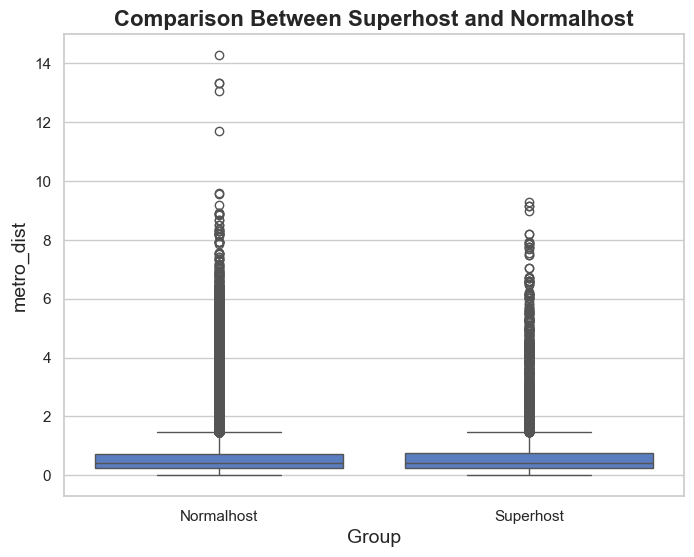

In [106]:
combined_df['group'] = combined_df['host_is_superhost']
compare_groups('Superhost', 'Normalhost', combined_df, 'metro_dist')

Mean for Superhost: 9.83
Mean for Normalhost: 9.24
Median for Superhost: 10.00
Median for Normalhost: 9.00
Shapiro-Wilk test for Superhost: Stat=0.40942022840678105, p-value=2.5116280811435674e-109
Shapiro-Wilk test for Normalhost: Stat=0.6917886882899874, p-value=1.5125407817786556e-120
One or both groups' data is not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U Test Results: U-stat=350501184.5, p-value=0.0
Conclusion: Significant difference between Superhost and Normalhost.
Conclusion: Superhost has higher values for cleanliness_rating.


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13232.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38475.
  res = hypotest_fun_out(*samples, **kwds)


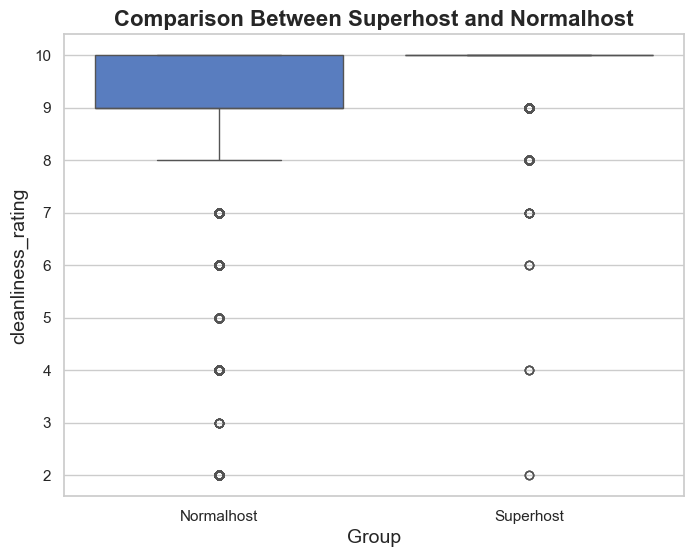

In [107]:
# 5) Are superhosts cleaner than normal hosts?

combined_df['group'] = combined_df['host_is_superhost']
compare_groups('Superhost', 'Normalhost', combined_df, 'cleanliness_rating')

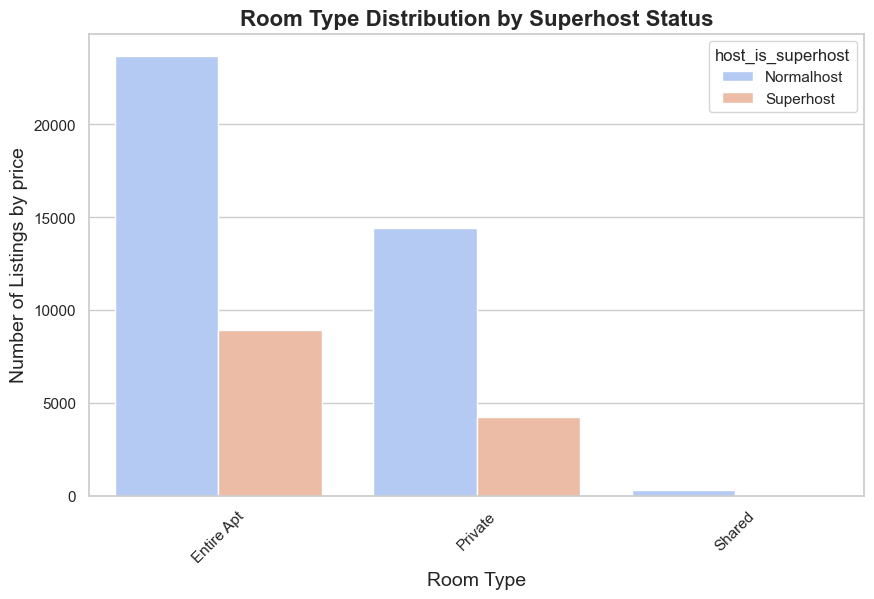


Chi-squared Test Results for room_type and Superhost Status:
Chi2 Stat=176.54, p-value=0.000000
Degrees of freedom=2
Expected frequencies:
[[24293.26396813  8354.73603187]
 [13909.39669677  4783.60330323]
 [  272.3393351     93.6606649 ]]

Conclusion: There is a significant relationship between room type and superhost status.

Expected Frequencies (if there were no relationship between the two variables):
host_is_superhost    Normalhost    Superhost
room_type                                   
Entire Apt         24293.263968  8354.736032
Private            13909.396697  4783.603303
Shared               272.339335    93.660665


In [108]:
# 6) Is there a pattern between room types and superhost status?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def compare_room_type_and_superhost(combined_df, room_type_column, column, palette='viridis'):
    """
    Compare the distribution of room types based on superhost status and perform a Chi-squared test.
    
    Parameters:
    - combined_df: DataFrame containing the dataset.
    - room_type_column: The column for room types (e.g., room_type).
    - column: The column to analyze (e.g., price, cleanliness_rating).
    - palette: The color palette for the bar plot (default is 'viridis').
    """

    room_type_superhost_count = combined_df.groupby([room_type_column, 'host_is_superhost']).size().reset_index(name='count')

    plt.figure(figsize=(10, 6))
    sns.barplot(data=room_type_superhost_count, x=room_type_column, y='count', hue='host_is_superhost', palette=palette)
    plt.title(f"Room Type Distribution by Superhost Status", fontsize=16, fontweight='bold')
    plt.xlabel("Room Type", fontsize=14)
    plt.ylabel(f"Number of Listings by {column}", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

    contingency_table = pd.crosstab(combined_df[room_type_column], combined_df['host_is_superhost'])
    
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"\nChi-squared Test Results for {room_type_column} and Superhost Status:")
    print(f"Chi2 Stat={chi2_stat:.2f}, p-value={p_value:.6f}")
    print(f"Degrees of freedom={dof}")
    print(f"Expected frequencies:")
    print(expected)

    if p_value < 0.05:
        print("\nConclusion: There is a significant relationship between room type and superhost status.")
    else:
        print("\nConclusion: There is no significant relationship between room type and superhost status.")

    print("\nExpected Frequencies (if there were no relationship between the two variables):")
    print(pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index))

compare_room_type_and_superhost(combined_df, 'room_type', 'price', palette='coolwarm')


Mean for Entire Apt: 324.32
Mean for Private: 204.94
Median for Entire Apt: 248.46
Median for Private: 166.37
Shapiro-Wilk test for Entire Apt: Stat=0.4189570690731633, p-value=2.778520780427701e-134
Shapiro-Wilk test for Private: Stat=0.21679361165942468, p-value=8.512693307964441e-127
One or both groups' data is not normally distributed, performing Mann-Whitney U test...
Mann-Whitney U Test Results: U-stat=430383459.5, p-value=0.0
Conclusion: Significant difference between Entire Apt and Private.
Conclusion: Entire Apt has higher values for price.


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32648.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18693.
  res = hypotest_fun_out(*samples, **kwds)


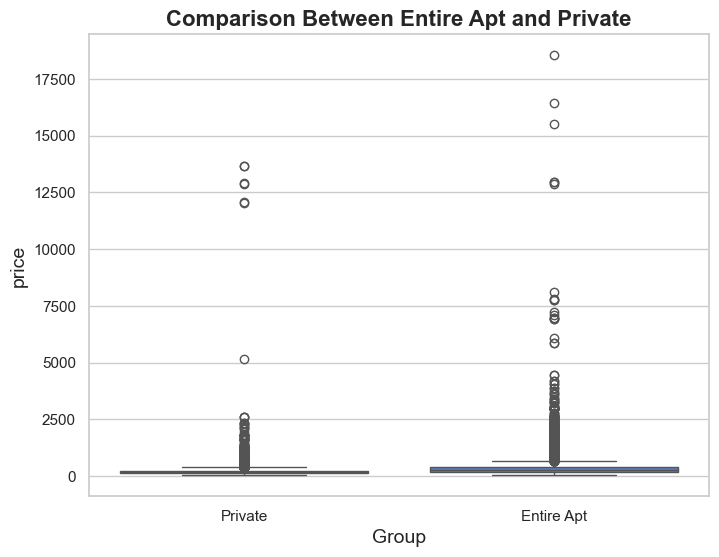

In [109]:
# 7) Is renting an entire home/apt more expensive than a private room? Does that depend on the city?

combined_df['group'] = combined_df['room_type'] 
compare_groups('Entire Apt', 'Private', combined_df, 'price')

In [110]:
def plot_price_map(city_name):
    city_data = combined_df[combined_df['city'] == city_name]
    top_10_expensive = city_data.nlargest(10, 'price')
    top_10_cheap = city_data.nsmallest(10, 'price')
    city_center = [city_data['lat'].mean(), city_data['lng'].mean()]
    city_map = folium.Map(location=city_center, zoom_start=12)
    for _, row in top_10_expensive.iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=f"Price: {row['price']}",
            icon=folium.Icon(color='green')
        ).add_to(city_map)
    for _, row in top_10_cheap.iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=f"Price: {row['price']}",
            icon=folium.Icon(color='blue')
        ).add_to(city_map)

    return city_map

plot_price_map("Paris")

In [111]:
# Bonus Questions

In [115]:
conditions = [
    (combined_df['multi'] == 0) & (combined_df['biz'] == 0),
    (combined_df['multi'] == 1) & (combined_df['biz'] == 0),
    (combined_df['biz'] == 1)
]
choices = ['Single', 'Two-Four', 'More than four']
combined_df['listing_num'] = np.select(conditions, choices, default='Unknown')

In [117]:
combined_df['listing_num'].unique()

array(['Two-Four', 'Single', 'More than four'], dtype=object)

In [119]:
affordable_listings = combined_df[combined_df['price'] < 300]
affordable_listings['monthly_cost'] = affordable_listings['price'] * 30
display(affordable_listings[['city', 'price', 'monthly_cost']].head())
multiple_property_hosts = affordable_listings[affordable_listings['listing_num'].isin(['Two-Four', 'More than four'])]
count_affordable_multiple_hosts = multiple_property_hosts.shape[0]
display(multiple_property_hosts[['city', 'price', 'listing_num', 'dist']].head())

display(f"Number of affordable listings owned by hosts with multiple properties: {count_affordable_multiple_hosts}")
affordable_multiple_property_hosts_closer = multiple_property_hosts[multiple_property_hosts['dist'] < multiple_property_hosts['dist'].median()]
display(affordable_multiple_property_hosts_closer[['city', 'price', 'listing_num', 'dist']].head())

display(f"Number of affordable listings owned by hosts with multiple properties and closer to the city center: {affordable_multiple_property_hosts_closer.shape[0]}")

C:\Users\DELL\AppData\Local\Temp\ipykernel_7944\3708559327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affordable_listings['monthly_cost'] = affordable_listings['price'] * 30


,city,price,monthly_cost
0,Amsterdam,194.033698,5821.010944
2,Amsterdam,264.101422,7923.042673
6,Amsterdam,215.124317,6453.729525
9,Amsterdam,276.521454,8295.643615
14,Amsterdam,209.031472,6270.944157


,city,price,listing_num,dist
0,Amsterdam,194.033698,Two-Four,5.022964
2,Amsterdam,264.101422,More than four,5.748312
9,Amsterdam,276.521454,Two-Four,3.142361
14,Amsterdam,209.031472,Two-Four,7.304535
20,Amsterdam,243.245143,Two-Four,2.870633


'Number of affordable listings owned by hosts with multiple properties: 23948'

,city,price,listing_num,dist
22,Amsterdam,251.915731,Two-Four,1.247084
112,Amsterdam,250.744030,Two-Four,2.061577
145,Amsterdam,180.207625,Two-Four,2.196437
173,Amsterdam,228.716050,Two-Four,1.258901
199,Amsterdam,290.113186,Two-Four,2.210546


'Number of affordable listings owned by hosts with multiple properties and closer to the city center: 11974'

C:\Users\DELL\AppData\Local\Temp\ipykernel_7944\2647698073.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=multiple_property_hosts, x='city', y='monthly_cost', palette='magma')


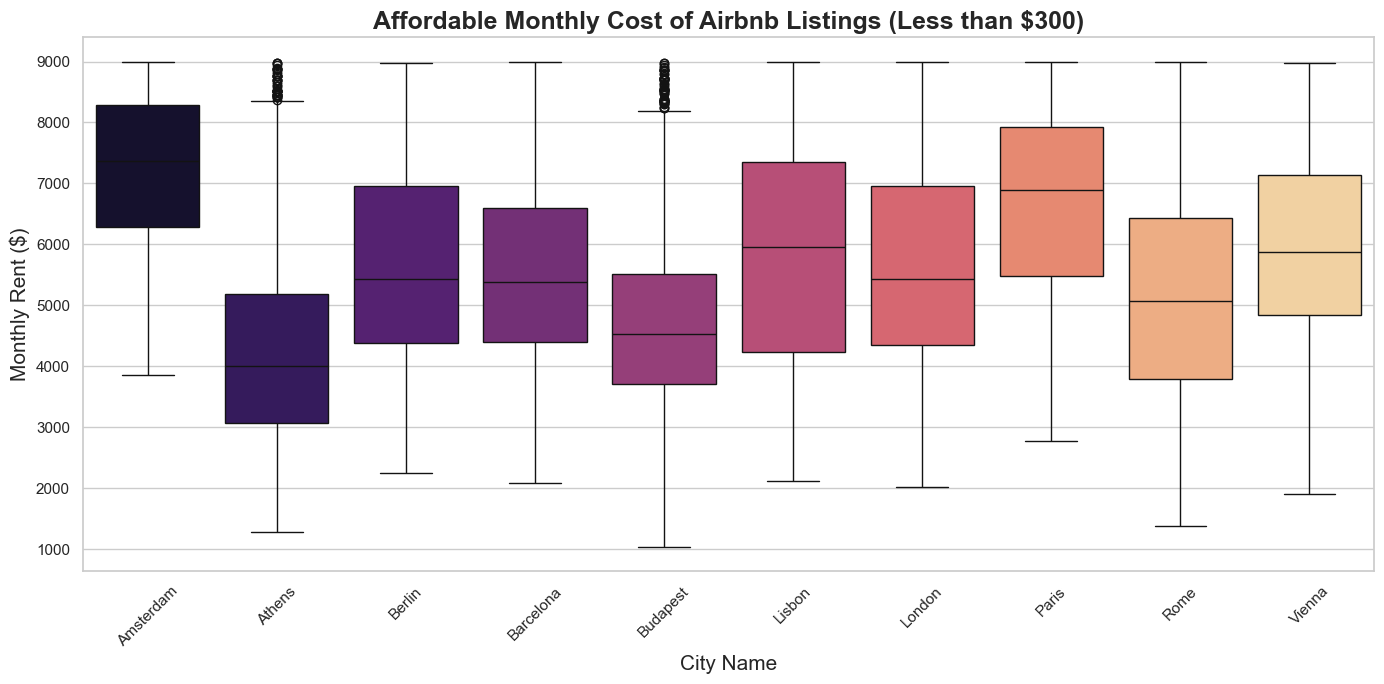

In [125]:

plt.figure(figsize=(14, 7))
sns.boxplot(data=multiple_property_hosts, x='city', y='monthly_cost', palette='magma')
plt.title("Affordable Monthly Cost of Airbnb Listings (Less than $300)", fontsize=18, fontweight='bold')

plt.xlabel("City Name", fontsize=15, fontweight='light')
plt.ylabel("Monthly Rent ($)", fontsize=15)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7944\907475800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=multiple_property_hosts, x='listing_num', y='monthly_cost', palette='plasma')


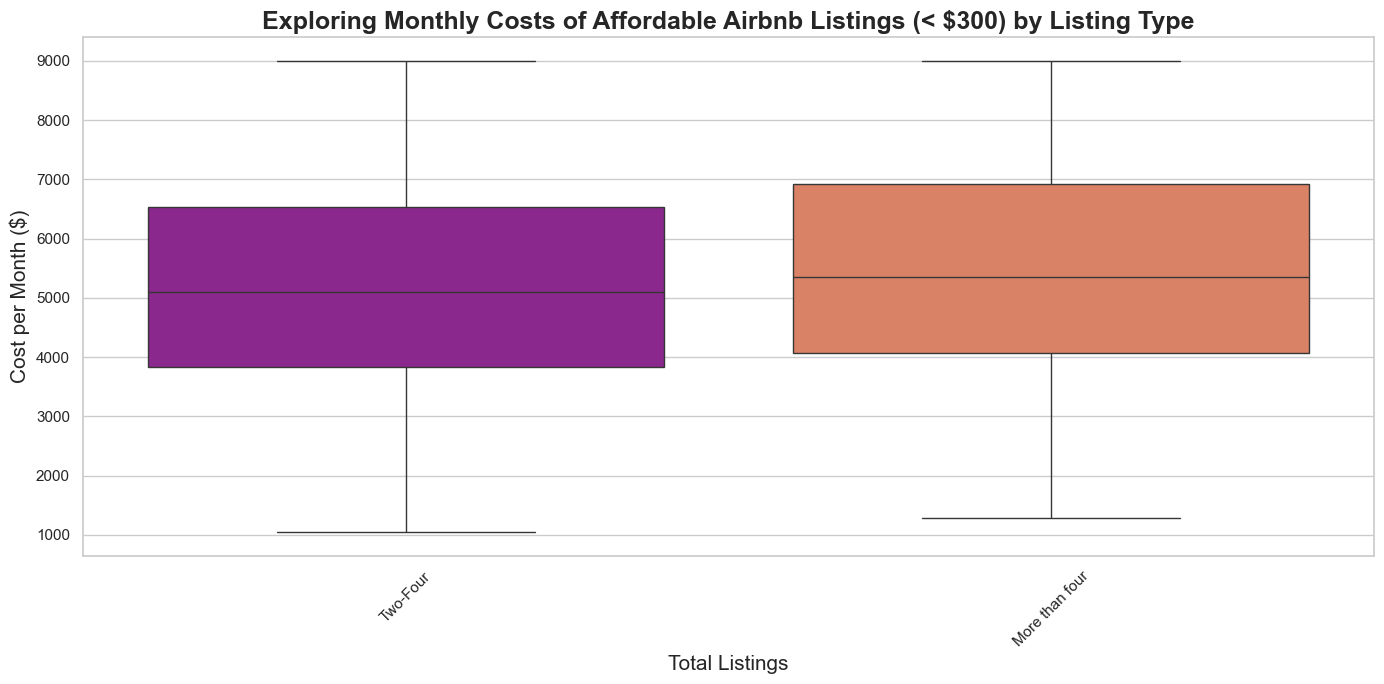

In [127]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=multiple_property_hosts, x='listing_num', y='monthly_cost', palette='plasma')

plt.title("Exploring Monthly Costs of Affordable Airbnb Listings (< $300) by Listing Type", fontsize=18, fontweight='bold')
plt.xlabel("Total Listings", fontsize=15)
plt.ylabel("Cost per Month ($)", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
